In [1]:
####
import os
import pickle5

####
import pandas as pd
import numpy as np
import scipy as sp
import geopandas as gpd
import pysal
from pyproj import Proj, transform
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
import seaborn as sns
from scipy import stats
import powerlaw
import networkx as nx

import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

C:\Users\cip15ha\Anaconda3\envs\iaa\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\cip15ha\Anaconda3\envs\iaa\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [5]:
def mm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple((i/10)/inch for i in tupl[0])
    else:
        return tuple((i/10)/inch for i in tupl)
    
def load_obj(name ):
    with open('resources/' + name + '.pkl', 'rb') as f:
        return pickle5.load(f)
def save_obj(obj, name ):
    with open('resources/' + name + '.pkl', 'wb') as f:
        pickle5.dump(obj, f, pickle5.HIGHEST_PROTOCOL)

In [20]:
#loading data
scr_data = load_obj('newdata_lsoa_data')
scr = scr_data['sheff_lsoa_shape']
pps = scr_data['sheff_lsoa_pop']

display(scr_data.keys(),
        scr_data['sheff_lsoa_shape'].head(), #dataframe
        scr_data['sheff_lsoa_pop'].head(), #dataframe
        scr_data['sheff_lsoa_income'].head(), #dataframe
        scr_data['sheff_lsoa_education'].head(), #dataframe
#         scr_data['income_params'], #array
#         scr_data['edu_counts'], #array
#         scr_data['edu_ratios'] #array
       )

dict_keys(['sheff_lsoa_shape', 'sheff_lsoa_pop', 'sheff_lsoa_income', 'sheff_lsoa_education', 'income_params', 'edu_counts', 'edu_ratios'])

,lsoa11cd,geometry
0,E01007317,"POLYGON ((436628.451 404958.251, 436629.006 40..."
1,E01007318,"POLYGON ((436297.734 405345.054, 436302.644 40..."
2,E01007319,"POLYGON ((438230.147 405495.147, 438234.657 40..."
3,E01007320,"POLYGON ((436900.948 405335.316, 436875.815 40..."
4,E01007321,"POLYGON ((438584.414 406731.414, 438588.832 40..."


,lsoa11cd,CAUTH18NM,date,lsoa11nm,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value,geometry,KS101EW0001,GeographyCode
0,E01007317,Sheffield City Region,2011,Barnsley 018A,Total,1493,747,746,1493,0,5,62.36,23.9,None,1493,E01007317
1,E01007318,Sheffield City Region,2011,Barnsley 018B,Total,1544,781,763,1507,37,9,29.72,52,None,1544,E01007318
2,E01007319,Sheffield City Region,2011,Barnsley 015A,Total,1465,718,747,1465,0,8,124.53,11.8,None,1465,E01007319
3,E01007320,Sheffield City Region,2011,Barnsley 018C,Total,1596,798,798,1596,0,7,36.92,43.2,None,1596,E01007320
4,E01007321,Sheffield City Region,2011,Barnsley 015B,Total,1433,690,743,1433,0,10,176.11,8.1,None,1433,E01007321


,geo_code,geo_label,LA_CODE,LA_NAME,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6,Rank_7,Rank_8,Rank_9,No_info,geometry,lsoa11cd
0,E01007317,Barnsley 018A,E08000016,Barnsley,0.002,0.101,0.214,0.258,0.173,0.141,0.035,0.008,0.003,0.065,"POLYGON ((436598.869 405066.534, 436597.333 40...",E01007317
1,E01007318,Barnsley 018B,E08000016,Barnsley,0.001,0.103,0.172,0.235,0.201,0.166,0.040,0.008,0.005,0.070,"POLYGON ((436056.740 405373.715, 436047.674 40...",E01007318
2,E01007319,Barnsley 015A,E08000016,Barnsley,0.003,0.090,0.197,0.186,0.156,0.157,0.084,0.045,0.006,0.076,"POLYGON ((437988.568 405626.555, 437989.000 40...",E01007319
3,E01007320,Barnsley 018C,E08000016,Barnsley,0.001,0.118,0.202,0.223,0.180,0.166,0.032,0.008,0.000,0.070,"POLYGON ((436573.046 405853.470, 436580.500 40...",E01007320
4,E01007321,Barnsley 015B,E08000016,Barnsley,0.004,0.073,0.188,0.188,0.154,0.172,0.092,0.042,0.010,0.077,"POLYGON ((438584.414 406731.414, 438588.832 40...",E01007321


,lsoa11cd,CAUTH18NM,date,lsoa11nm,Rural Urban,Qualifications: All categories: Highest level of qualification; measures: Value,Qualifications: No qualifications; measures: Value,Qualifications: Highest level of qualification: Level 1 qualifications; measures: Value,Qualifications: Highest level of qualification: Level 2 qualifications; measures: Value,Qualifications: Highest level of qualification: Apprenticeship; measures: Value,Qualifications: Highest level of qualification: Level 3 qualifications; measures: Value,Qualifications: Highest level of qualification: Level 4 qualifications and above; measures: Value,Qualifications: Highest level of qualification: Other qualifications; measures: Value,Qualifications: Schoolchildren and full-time students: Age 16 to 17; measures: Value,Qualifications: Schoolchildren and full-time students: Age 18 and over; measures: Value,Qualifications: Full-time students: Age 18 to 74: Economically active: In employment; measures: Value,Qualifications: Full-time students: Age 18 to 74: Economically active: Unemployed; measures: Value,Qualifications: Full-time students: Age 18 to 74: Economically inactive; measures: Value,geometry
0,E01007317,Sheffield City Region,2011,Barnsley 018A,Total,1195,537,191,181,41,113,101,31,40,30,13,1,16,None
1,E01007318,Sheffield City Region,2011,Barnsley 018B,Total,1200,460,190,197,40,124,133,56,21,33,13,2,18,None
2,E01007319,Sheffield City Region,2011,Barnsley 015A,Total,1232,314,192,202,75,161,232,56,40,24,12,1,10,None
3,E01007320,Sheffield City Region,2011,Barnsley 018C,Total,1235,520,203,191,57,116,96,52,45,32,8,6,18,None
4,E01007321,Sheffield City Region,2011,Barnsley 015B,Total,1256,345,161,205,68,153,264,60,38,25,9,3,13,None


In [21]:
comphouse = np.load('resources/newdata_companyhouse.npy')
scr['comphouse'] = np.diagonal(comphouse)
scr['population'] = pd.to_numeric(pps.iloc[:,5].values)
scr['popnorm'] = scr['population']/np.mean(scr['population'].values.ravel())

display(comphouse) #lsoa-by-lsoa array

array([[0.66407056, 0.95979721, 0.95979721, ..., 0.94192398, 0.92281717,
        1.10978659],
       [0.95979721, 0.95979721, 0.95979721, ..., 0.95979721, 0.95979721,
        1.10978659],
       [0.95979721, 0.95979721, 0.95979721, ..., 0.95979721, 0.95979721,
        1.10978659],
       ...,
       [0.94192398, 0.95979721, 0.95979721, ..., 0.94192398, 0.94192398,
        1.10978659],
       [0.92281717, 0.95979721, 0.95979721, ..., 0.94192398, 0.92281717,
        1.10978659],
       [1.10978659, 1.10978659, 1.10978659, ..., 1.10978659, 1.10978659,
        1.10978659]])

In [22]:
paths = load_obj('newdata_ave_paths') #lsoa-by-lsoa road network distance array
paths = pd.DataFrame(paths)
paths.index = scr.lsoa11cd.values
paths.columns = scr.lsoa11cd.values
gpath = nx.from_pandas_adjacency(paths)
nx.set_node_attributes(gpath, dict(zip(scr.lsoa11cd.values, list(zip(scr.centroid.x.values, scr.centroid.y.values)))), "pos")

In [23]:
m_bus = np.load('resources/newdata_m_paths_bus.npy') #lsoa-by-lsoa bus inferred m array
m_bus = pd.DataFrame(m_bus)
m_bus.index = scr.lsoa11cd.values
m_bus.columns = scr.lsoa11cd.values
gm = nx.from_pandas_adjacency(m_bus)
nx.set_node_attributes(gm, dict(zip(scr.lsoa11cd.values, list(zip(scr.centroid.x.values, scr.centroid.y.values)))), "pos")

In [34]:
mc_bus = load_obj('normal_layout_1000run_bus')
scr['bus_edge_freqs']=mc_bus['edge_freqs'][0].mean(axis=0)

display(mc_bus.keys(),
        mc_bus['UrbanYs'], #list of Ys estimated for each Monte Carlo run
        mc_bus['edge_freqs'], #lsoa-bylsoa array of freqency of a connection being detected
        mc_bus['edge_widths'] #lsoa-bylsoa array of population weighted number of interactions
       )

dict_keys(['UrbanYs', 'edge_freqs', 'edge_widths'])

[[526009095321.5622,
  5770602042732.056,
  1422086075235.8196,
  530336150167.3745,
  835691208952.7566,
  1679362350828.295,
  641133363079.6644,
  346766359824.6488,
  1361714049822.496,
  955407393034.0629,
  5292889687422.062,
  3450342125344.769,
  5484586133615.448,
  984141312474.878,
  977145894055.0245,
  493009125633.1752,
  325868026541.2717,
  283314589788.85785,
  1252382618625.6426,
  1203842837943.9224,
  1469762487421.1396,
  6009484026569.013,
  6805715592110.932,
  6599689138665.148,
  827142666060.338,
  6302834488134.317,
  1067065977021.6168,
  1453708597095.3323,
  6276826894335.878,
  771827256004.6329,
  6246855070056.607,
  6506076385897.64,
  1933256440338.8567,
  506633774119.20386,
  1258401954860.1895,
  5527146383000.606,
  254828457541.82043,
  119749204741.55077,
  229601717042.38568,
  6200779404274.69,
  398806017228.1937,
  542219206740.90594,
  1269679410503.3115,
  5424893253909.99,
  1145182423279.934,
  1211867463918.4656,
  1006805222266.8317,
 

[array([[0.   , 0.534, 0.511, ..., 0.096, 0.09 , 0.203],
        [0.52 , 0.   , 0.616, ..., 0.105, 0.099, 0.204],
        [0.519, 0.603, 0.   , ..., 0.12 , 0.108, 0.224],
        ...,
        [0.092, 0.085, 0.138, ..., 0.   , 0.484, 0.194],
        [0.091, 0.096, 0.127, ..., 0.483, 0.   , 0.195],
        [0.178, 0.177, 0.22 , ..., 0.202, 0.173, 0.   ]])]

[array([[      0.   , 1230972.528, 1117682.195, ...,  348430.368,
          319531.86 ,  496140.323],
        [1198699.84 ,       0.   , 1393367.36 , ...,  394113.72 ,
          363491.568,  515615.712],
        [1135180.155, 1363961.88 ,       0.   , ...,  427369.8  ,
          376247.16 ,  537197.92 ],
        ...,
        [ 333912.436,  319044.44 ,  491475.27 , ...,       0.   ,
         2797964.312,  772032.118],
        [ 323082.214,  352476.672,  442438.79 , ..., 2792183.394,
               0.   ,  759093.27 ],
        [ 435039.298,  447372.456,  527605.1  , ...,  803868.494,
          673451.978,       0.   ]])]

In [35]:
display(scr)

,lsoa11cd,geometry,comphouse,population,popnorm,bus_freqs,bus_edge_freqs
0,E01007317,"POLYGON ((436628.451 404958.251, 436629.006 40...",0.664071,1493,0.947848,0.185727,0.185727
1,E01007318,"POLYGON ((436297.734 405345.054, 436302.644 40...",0.959797,1544,0.980226,0.224242,0.224242
2,E01007319,"POLYGON ((438230.147 405495.147, 438234.657 40...",0.959797,1465,0.930072,0.266593,0.266593
3,E01007320,"POLYGON ((436900.948 405335.316, 436875.815 40...",1.007389,1596,1.013238,0.220868,0.220868
4,E01007321,"POLYGON ((438584.414 406731.414, 438588.832 40...",0.749965,1433,0.909756,0.265243,0.265243
...,...,...,...,...,...,...,...
848,E01033276,"POLYGON ((434853.291 387758.154, 434854.492 38...",0.880127,2923,1.855699,0.427982,0.427982
849,E01033277,"POLYGON ((435642.000 391989.000, 435641.211 39...",1.124495,2334,1.481766,0.244970,0.244970
850,E01033278,"POLYGON ((440448.588 383277.000, 440434.999 38...",0.941924,2431,1.543347,0.194841,0.194841
851,E01033279,"POLYGON ((441175.029 383265.479, 441149.132 38...",0.922817,2378,1.509700,0.194053,0.194053


Text(0.0, 1.0, '$\\bf{C}$')

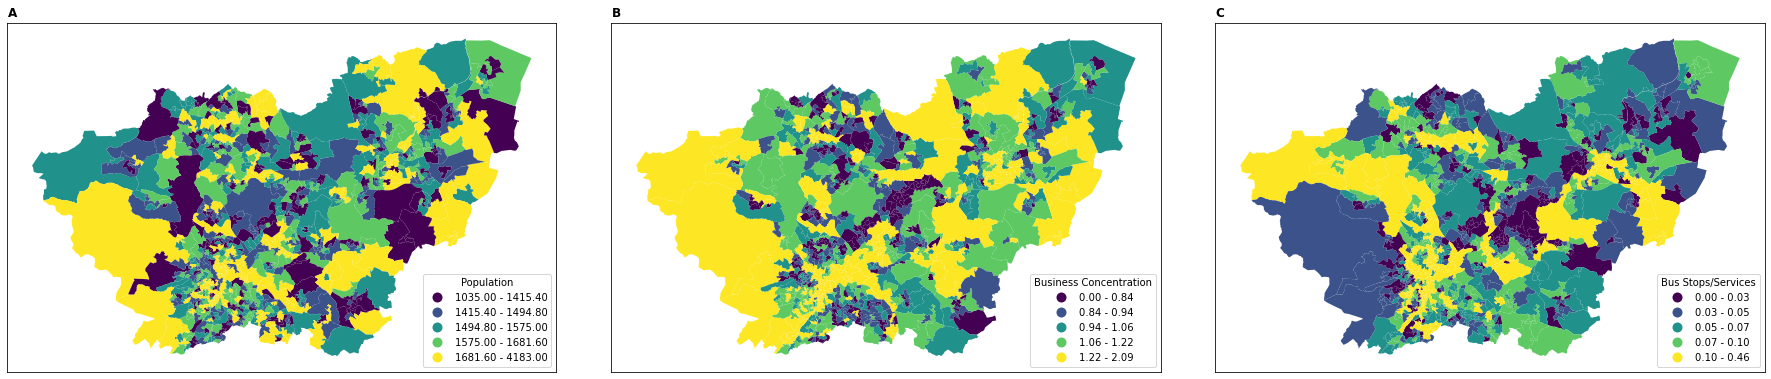

In [36]:
fig = plt.figure(figsize=mm2inch(800, 800/4.5))
gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1], wspace=0.1, hspace=0.08)
ax10 = fig.add_subplot(gs[0])
ax11 = fig.add_subplot(gs[1])
ax12 = fig.add_subplot(gs[2])


#company presence, deviation from regional mean
scr.plot(column='population', legend=True, 
         legend_kwds=({'title':'Population', 'loc':'lower right'}),
         scheme='Quantiles', 
         cmap='viridis', ax=ax10)
ax10.set_xticks([])
ax10.set_yticks([])

#company presence, deviation from regional mean
scr.plot(column='comphouse', legend=True, 
         legend_kwds=({'title':'Business Concentration', 'loc':'lower right'}),
         scheme='Quantiles', 
         cmap='viridis', ax=ax11)
ax11.set_xticks([])
ax11.set_yticks([])


#m bus modifiers
scr['busintensity'] = ((1-m_bus)).mean().values
scr.plot(column='busintensity', legend=True, 
         legend_kwds=({'title':'Bus Stops/Services', 'loc':'lower right'}),
         scheme='Quantiles', 
         cmap='viridis', ax=ax12)
ax12.set_xticks([])
ax12.set_yticks([])

# ax12.set_ylabel('Top 10% Interaction Increase')
# ax11.set_ylabel('Normalized Mean Income Level')
# ax13.set_ylabel('')
# ax11.set_xlabel('Sheffield Baseline')
# ax12.set_xlabel('Scenario 1')
# ax13.set_xlabel('Scenario 3')

# ax12.annotate(r'Penalty$\propto$Distance$^{-1}$', (412000,378000))
# ax12.annotate(r'Penalty$\propto$Distance$^{-1.5}$', (415000,380000))
# ax13.annotate(r'Penalty$\propto$Distance$^{-1}$', (412000,378000))

ax10.set_title(r'$\bf{A}$', loc='left', y=1.0)
ax11.set_title(r'$\bf{B}$', loc='left', y=1.0)
ax12.set_title(r'$\bf{C}$', loc='left', y=1.0)

Text(0.0, 1.0, '$\\bf{C}$')

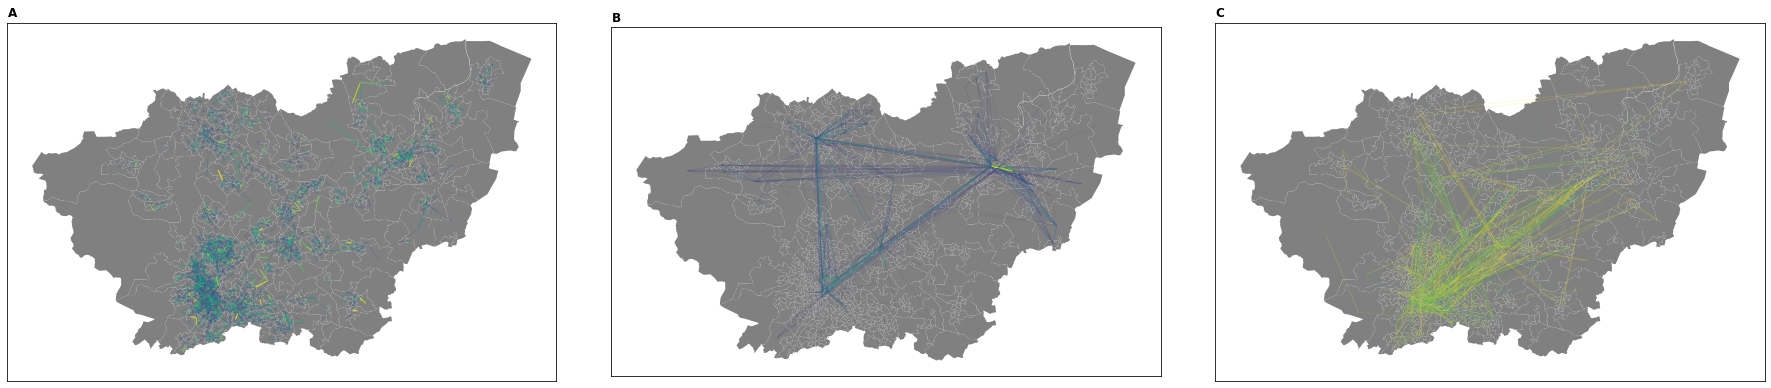

In [37]:
fig = plt.figure(figsize=mm2inch(800, 800/4.5))
gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1], wspace=0.1, hspace=0.08)
ax11 = fig.add_subplot(gs[0])
ax12 = fig.add_subplot(gs[1])
ax13 = fig.add_subplot(gs[2])

#road distances
gfig = gpath.copy()
threshold = np.percentile(paths.values.ravel(), 1)
gfig.remove_edges_from([(n1, n2) for n1, n2, w in gfig.edges(data="weight") if w > threshold])
edges, weights = zip(*nx.get_edge_attributes(gfig,'weight').items())
wmax = max(list(weights))

scr.plot(color='gray', ax=ax11)
nx.draw_networkx_edges(gfig, pos=nx.get_node_attributes(gfig, "pos"),
                       edge_color=[1-(i/wmax) for i in weights],
                       alpha=[1-(i/wmax) for i in weights],
                       ax=ax11)
ax11.set_xticks([])
ax11.set_yticks([])

#m bus modifiers
gfig = gm.copy()
threshold = np.percentile(m_bus.values.ravel()[m_bus.values.ravel()<1], 1)
gfig.remove_edges_from([(n1, n2) for n1, n2 in gfig.edges() if n1 == n2])
gfig.remove_edges_from([(n1, n2) for n1, n2, w in gfig.edges(data="weight") if w > threshold])
edges, weights = zip(*nx.get_edge_attributes(gfig,'weight').items())
wmax = max(list(weights))

scr.plot(color='gray', ax=ax12)
nx.draw_networkx_edges(gfig, pos=nx.get_node_attributes(gfig, "pos"),
                       edge_color=[1-(i/wmax) for i in weights],
                       alpha=[1-(i/wmax) for i in weights],
                       ax=ax12)
ax12.set_xticks([])
ax12.set_yticks([])

#m bus modifiers
gfig = gm.copy()
threshold = np.percentile(m_bus.values.ravel()[m_bus.values.ravel()<1], 99)
gfig.remove_edges_from([(n1, n2) for n1, n2 in gfig.edges() if n1 == n2])
gfig.remove_edges_from([(n1, n2) for n1, n2, w in gfig.edges(data="weight") if w < threshold])
edges, weights = zip(*nx.get_edge_attributes(gfig,'weight').items())
wmax = max(list(weights))

scr.plot(color='gray', ax=ax13)
nx.draw_networkx_edges(gfig, pos=nx.get_node_attributes(gfig, "pos"),
                       edge_color=[1-(i/wmax) for i in weights],
                       alpha=[1-(i/wmax) for i in weights],
                       ax=ax13)
ax13.set_xticks([])
ax13.set_yticks([])

# # ax12.set_ylabel('Top 10% Interaction Increase')
# # ax11.set_ylabel('Normalized Mean Income Level')
# # ax13.set_ylabel('')
# # ax11.set_xlabel('Sheffield Baseline')
# # ax12.set_xlabel('Scenario 1')
# # ax13.set_xlabel('Scenario 3')

# # ax12.annotate(r'Penalty$\propto$Distance$^{-1}$', (412000,378000))
# # ax12.annotate(r'Penalty$\propto$Distance$^{-1.5}$', (415000,380000))
# # ax13.annotate(r'Penalty$\propto$Distance$^{-1}$', (412000,378000))

ax11.set_title(r'$\bf{A}$', loc='left', y=1.0)
ax12.set_title(r'$\bf{B}$', loc='left', y=1.0)
ax13.set_title(r'$\bf{C}$', loc='left', y=1.0)